
# Вычисление теплоемкости за счет линейного программирования

In [1]:
from cylp.cy import CyClpSimplex
from cylp.py.modeling.CyLPModel import CyLPArray

import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
length = 4                      # Длина теплообменника         [м]
time = 300                      # Время работы теплообменника  [с]
rball = 0.01                    # Радиус однгого шара засыпки  [м]
rbckfill = 2                    # Радиус засыпки               [м]
fi = 0.4                        # Пористость                   [доля]
MN = 4186.                      # Коэффициент перевода в килокаллории
# Расчет объема засыпки [м^3]
vbckfill = np.pi * rbckfill**2 * (1 - fi)

# Расчет количества шаров [шт]
cball = vbckfill/((4*np.pi/3)*rball**3)

# Расчет удельной площади теплообмена [м^2]
surf_spec = cball * 4 * np.pi * rball ** 2

# Расчет площади живого сечения для прохождения теплоносителя через засыпку  [м^2]
fgib = np.pi*fi*rbckfill**2

# Расчет эквивалентного диаметра засыпки (для расчета теплообмена) [м]
dekb=(4/3)*(fi/(1-fi))*rball

TG = 1000

In [7]:
MASS = 26.98154*2+15.9994*3       # Al2O3 г/моль

# Теплопроводность керамики        [ккал/м*с*К]
lamcer_A = np.array([-43.9595654, 0.0113006956,
              1251.80322, 719874.068])/MN
def lam(TC):
    A = lamcer_A
    return A[0] + A[1]* TC + A[2]/np.sqrt(TC) + A[3]/TC**2

# Теплоемкость керамики           [ккал/кг*К]
ccer_A1 = np.array([153.43, 1.9681e-3,
               -900.63,-2.0307e+6])
ccer_A2 = np.array([100.849518,0.150388616, 
               -1176.47884,149808.151])    
def ccer(TC):
    MN = MASS*4.186
    if TC > 298.1:
        A = ccer_A1/MN
    else:
        A = ccer_A2/MN
    return A[0] + A[1]* TC + A[2]/np.sqrt(TC) + A[3]/TC**2

# Плотность керамики [кг/м^3]
def rho_cer(TC):
    A = np.array([-8.90655002e-06,-9.31235452e-02,3.97251537e+03])
    T = TC - 273.15
    return (A[0]*T+A[1])*T+A[2]

# Температуропроводность керамики | [м^2/с]
def a(TC):
    return lam(TC)/ccer(TC)/rho_cer(TC)

# Удельная масса керамики   | [кг/м]
qmass_spec = vbckfill*rho_cer(293.15)

In [9]:
vccer = np.vectorize(ccer)

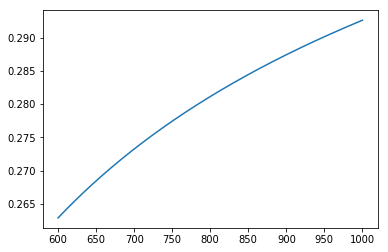

In [15]:
t = np.linspace(600,1000,1000)
plt.plot(t,vccer(t))